# COMP20230 Assignment 1

## Introduction

This assignment begins with an iterative factorial algorithm. In question 2 I implement the factorial algorithm using three different approaches. The running time of these functions is then plotted as a function of n. In question 3 I use the sequence obtained from the iterative factorial function as an input for a binary search algorithm. I implement the search algorithm iteratively and recursively. In question 4 I plot the best and worst running times of these search algorithms as a function of n. Finally I use curve-fitting algorithms to find the equation of these running times. Findings of my results are discussed throughout. 

In [1]:
import timeit
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import time
import unittest
import json

## Q1 - factorial algorithm

Below is an iterative algorithm to compute the factorial of a positive number. The factorial of an integer n is defined as the product of the integers from 1 to n. 

__algorithm__ *factorial(n)*<br>
__input:__ n, a natural number<br>
__Output:__ the nth factorial number<br>
1: if *n* = 1 then<br>
2:    __return__ 1<br>
3: else<br>
4:    __return__ n* factorial(n-1)<br>
5: endif<br>

## Q2 - factorials

In the cell below is an iterative factorial function. This function takes the value ```n``` as an argument. The variable ```fact``` is initialised to the value of ```n```. The function uses a while loop to iteratively decrease the value of ```n``` by 1 and assign ```fact``` to the value of ```fact``` multiplied by ```n```. When the value of ```n``` is no longer greater than 1 the factorial value is returned. 

In [2]:
def iterative_fact(n):
    '''function to return the factorial of n'''
    
    #assign fact to the value of n
    fact = n
    
    #while n is greater than zero decrement n     
    while n > 1:
        n -= 1
        fact = fact*n #multiple fact by n
    return fact

Next I implement a non-tail recursive algorithm to compute the factorial of ```n```. As explained in lecture 6, a recursive function is one which makes one or more calls to itself. More specifically, a non-tail recursive function is one which still has further processing to do after the function returns. 

This is seen in the cell below where an additional multiplication by ```n``` is performed after the recursive call is completed. 

```non_tail_recursive_fact``` takes ```n``` as an argument. If ```n``` is equal to $1$ then the value $1$ is returned. This is the base case and when it is reached no further recursive calls are made.  

In [3]:
def non_tail_recursive_fact(n):
    '''recursive function to return the factorial of n'''
    
    if n == 1: #this is the base case
        return 1
    else:
        #multiplication by n occurs after recursively calling the function
        return n*non_tail_recursive_fact(n-1)

Next I implement a tail-recursive algorithm to caculate the factorial of a number. Tail recursive means that any recursive call made within the function is the last thing executed by the function. 

```tail_recursive_fact``` takes two arguments. The first argument is ```n```. The second argument accumulates the factorial value. When the base case is reached, the accumulator is returned. In the function below I have initialised the accumulator to $1$. 

In [4]:
def tail_recursive_fact(n, acc = 1):
    '''tail recursive function to return the factorial of n'''
    
    if n == 1: #this is the base case
        return acc #return accumulator when base case reached
    else:
        #recursively call the function
        return tail_recursive_fact(n-1, n*acc) 

As described at https://docs.python.org/3.7/library/unittest.html and in lab 4, I have implemented unit testing in the cell below to test that the factorial functions are working correctly. I compare the result returned by the function to known factorial values obtained from https://www.rapidtables.com/math/algebra/Factorial.html.

In [5]:
class Test_iterative_factorial(unittest.TestCase):
    
    def test_result(self):
        self.assertEqual(iterative_fact(5), 120)
        self.assertEqual(iterative_fact(1), 1)
        self.assertEqual(iterative_fact(12), 479001600)

class Test_tailrec_factorial(unittest.TestCase):

    def test_result(self):
        self.assertEqual(tail_recursive_fact(5), 120)
        self.assertEqual(tail_recursive_fact(1), 1)
        self.assertEqual(tail_recursive_fact(12), 479001600)

class Test_non_tailrec_factorial(unittest.TestCase):

    def test_result(self):
        self.assertEqual(non_tail_recursive_fact(5), 120)
        self.assertEqual(non_tail_recursive_fact(1), 1)
        self.assertEqual(non_tail_recursive_fact(12), 479001600)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_result (__main__.Test_iterative_factorial) ... ok
test_result (__main__.Test_non_tailrec_factorial) ... ok
test_result (__main__.Test_tailrec_factorial) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK


### Timing the factorial functions

In the cell below I have created a function called ```time_factorial``` to time the factorial functions implemented above using the ```timeit``` module. As described at https://docs.python.org/2/library/timeit.html, the ```timeit``` module takes a primary statement, a setup statement and the number of times to execute the primary statement.

The ```setup``` statement is executed only once. The primary statement refers to ```mycode``` below and is set equal to a function and an argument. I have set the number equal to a variable called ```t```. The value for ```t``` is passed as an argument to the ```time_factorial``` function. A single floating point value is returned by```time_factorial``` representing the amount of time it took to execute the primary statement ```t``` times. I then divide each element in the list of times by ```t``` to get the time taken for a single iteration of the function. 

Two lists are created within the ```time_factorial``` function. ```n``` is a list of indexes and ```fact_times``` is a list of times. As the function can only return one thing, a nested list is returned containing these lists. 

In order to investigate the running times further I considered changing the resursion limit from pythons default value of 1000 to 2000 using sys.setrecursionlimit(). However, in order to speed  up running time of my functions, I have left the range to 1000. 

In [6]:
def time_factorial(func, t):
    '''Times how long it takes to run a function.
    
    A function and a number are given as arguments. A list is returned which
    contains a list of n and a list of running times.
    '''
    
    #function name passed as string and concatenated to setup
    setup = "from __main__ import " + func
    
    #initalise empty lists for times and n
    times = []
    n = []
    
    for i in range(1,1000): #time each factorial function 1000 times. 
        n.append(i) #append i to the list n
        mycode = func +"(" + str(i) + ")"
        times.append(timeit.timeit(setup = setup, 
                                  stmt = mycode, 
                                  number = t)) #the number of times each iteration is timed
    
    #get time taken for a single iteration of the factorial by dividing by t
    fact_times = [x/t for x in times]
    
    #return a list containing the lists n and fact_times
    return [n, fact_times]

### Plotting the factorial functions

In the cell below the ```time_factorial``` function is called for each of the three factorial functions defined above. The name of the factorial function being timed is passed as a string to the ``time_factorial`` function. It is passed as a string as the ```setup``` statement requires a string. The second argument passed is the variable ```t``` in the ```time_factorial``` function. I have set this value as 1000 which means that each iteration of the function will be executed and timed 1000 times. 

A dictionary called ```fact_times``` is created to store the results returned from the ```time_factorial``` function. For each of the three factorial functions, the name of the function is a key in the dictionary and the value for each key is the list returned by the ```time_factorial``` function. This list comprises two lists, one for ```n``` and one for ```fact_times``` which is the running times. 

In [7]:
#create dictionary
fact_times = {}

### Saving results to text file

To make it more convenient while reading this assignment I have saved the dictionary ```fact_times``` to a text file. This file is opened below in order to plot the graphs with the same data that I have been working with. This will give a more accurate representation of my findings and dicussion.

I have commented out the cells below which were used to time the functions and add the results into the dictionary. The three cells below can be uncommented if you wish to run these again.

In [14]:
#call the time_factorial function for each of the factorial functions. 
#t will be assigned the value of 1000

#fact_times["iterative_list"] = time_factorial("iterative_fact", 1000)

In [15]:
#fact_times["non_tail_list"] = time_factorial("non_tail_recursive_fact", 1000)

In [16]:
#fact_times["tail_list"] = time_factorial("tail_recursive_fact", 1000)

In [17]:
#write the dictionary to a text file
#with open('fact_times.txt', 'w') as fp:
    #json.dump(fact_times, fp)

In the cell below is the code to read the content of the text file. The dictionary ```fact_times``` is assigned to the content of the file. This cell can be commented out if the  function calls above are being performed again. 

In [18]:
# read the content of the text file
# set the dictionary equal to the contents of the file
with open('fact_times.txt') as json_file:
    fact_times= json.load(json_file)

In the cell below I iterate through the dictionary ```fact_times``` created above in order to plot each of the factorial functions. For each key in the dictionary I create a variable ```l``` which is assigned to the value of that key. Thus ```l``` is a list of two lists which I then index in order to plot ```n``` on the x axis and the running times on the y axis. 

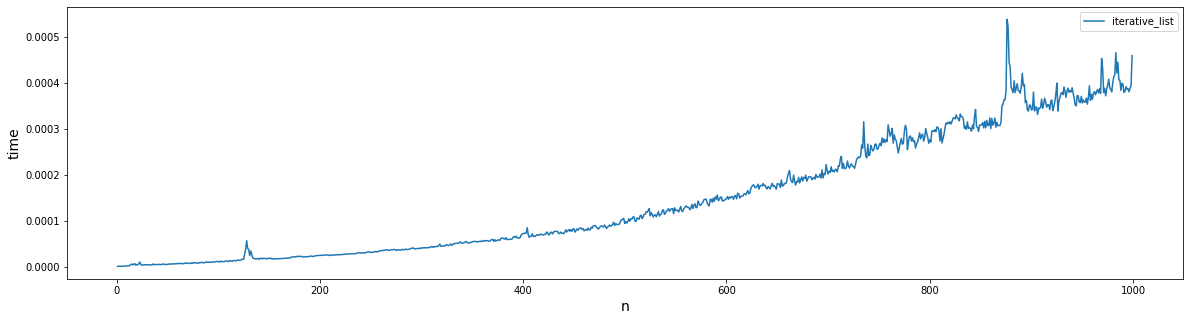

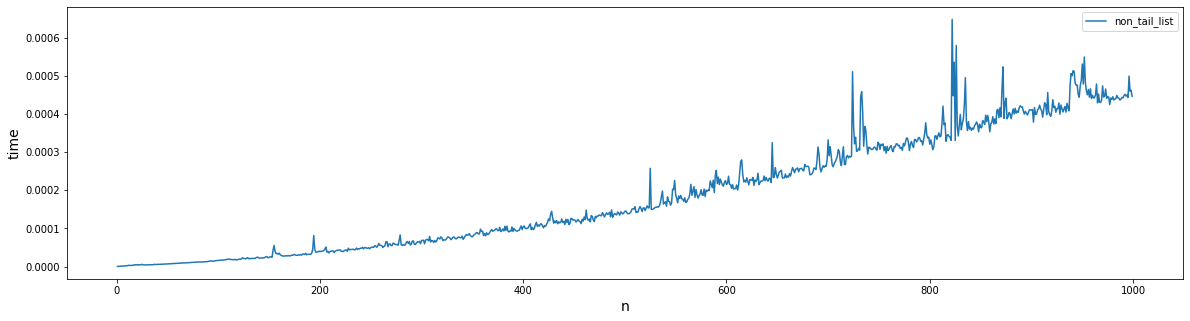

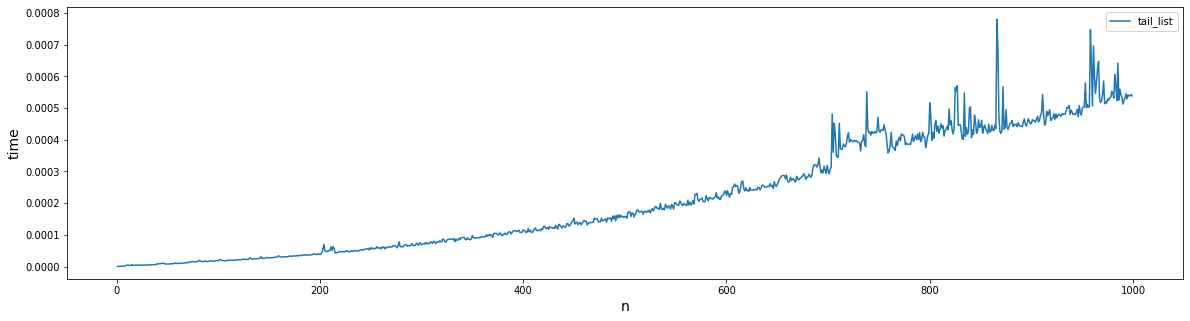

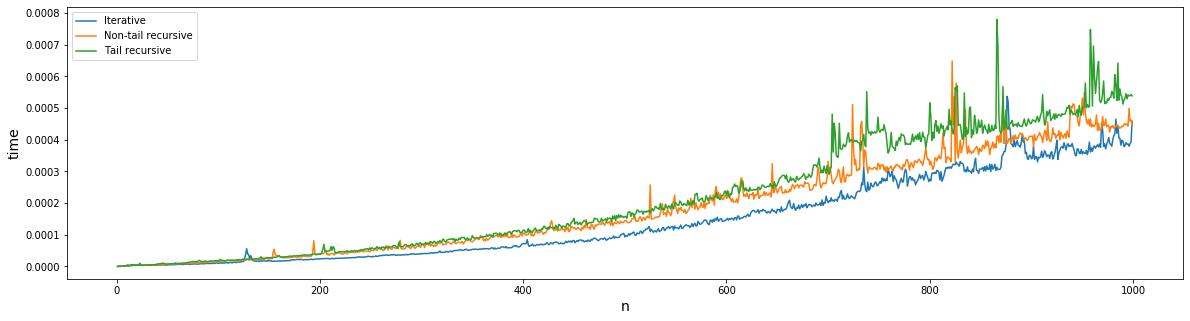

In [19]:
#s is key of the dict
for s in fact_times:

    #l is the value of the key
    l = fact_times[s]

    plt.figure(figsize=(20,5))
    #index the list. l[0] is n and l[1] is the running times
    plt.plot(l[0],l[1], label = s)
    #add labels 
    plt.xlabel('n',fontsize =14)
    plt.ylabel('time',fontsize =14)
    #show legend
    plt.legend()
    #show plot
    plt.show()



plt.figure(figsize=(20,5))
#plot functions
plt.plot(fact_times["iterative_list"][0],fact_times["iterative_list"][1], label = 'Iterative')
plt.plot(fact_times["non_tail_list"][0],fact_times["non_tail_list"][1], label = 'Non-tail recursive')
plt.plot(fact_times["tail_list"][0],fact_times["tail_list"][1], label = 'Tail recursive')
#add labels 
plt.xlabel('n',fontsize =14)
plt.ylabel('time',fontsize =14)
# #show legend
plt.legend()
# #show plot
plt.show()

We can see in the graphs that the functions have similar performance. ```tail_recursive_fact``` is slightly slower than ```non_tail_recursive_fact``` and ```iterative_fact```. Initially I expected the tail recursive function to be quicker than the non-tail function but as explained at http://www.openbookproject.net/thinkcs/python/english2e/ch11.html#tail-recursio, the python compiler does not support optomisation for tail recursive functions. This means that for the tail recursive function, python keeps each of the frames in the stack until the base case is reached and also has an additional accumulator to store in each stack. This would result in ```tail_recursive_fact``` have a slower running time than the non-tail function which has no accumator in the frames. 

As I expected, the iterative function is the quickest of the three. As there are no recursive function calls involved, there is only one frame in the stack consisting of ```n``` and ```fact``` variables. Less memory is used and the running time is quicker. 

All three graphs are quite noisy. This is understandable given that the computer is running multiple processes at once. 


## Q3 Search algorithms

In this question I implement linear and binary search algorithms. I give a sequence of factorials as the input to these search functions. 

I begin by implementing a linear search algorithm. This algorithm iterates through each element in an array and checks to see if each element is equal to the target. ```True``` is returned if the target is found. If the target is not in the array ```False``` is returned. 

In [20]:
def linear_search(arr, target):
    '''returns true if the target is found in the array'''
    #iterate through each element in the array
    for i in range(len(arr)):
        if arr[i] == target: #check if element is equal to the target
            return True
    return False

In the cell below I have implemented a binary search algorithm. This algorithm searches a sorted sequence and repeatedly divides what is to be searched in half. Initially, this algorithm checks if the mid point is equal to the target. If the target is less than the mid point, it then recursively calls the function on the lower half of the sequence. If the target is greater than the mid point, it then recursively calls the function on the upper half of the sequence. 

I have initialised ```high``` to ```None``` as I could not assign it to the length of ```arr``` within the function call. Within the function I then assign ```high``` to ```len(arr)-1```. In my binary search algorithm ```mid``` is ```(low + high)//2```.

In [21]:
def binary_search(arr, target, low = 0, high = None):
    '''Returns True if the target is in the array, False otherwise'''
    
    if high is None: 
        high = len(arr)-1 # high is equal to the length of the array -1 
    if low > high:
        return False
    else:
        mid = (low + high)//2 #this is the mid point we are searching for
        if target == arr[mid]:
            return True #return True if mid is equal to the target
        elif target < arr[mid]:
            return binary_search(arr, target, low, mid-1)
        else:
            return binary_search(arr, target, mid + 1, high)  

This test is to ensure that the linear and binary search functions are working correctly. 

In [22]:
class TestLinearSearch(unittest.TestCase):
    
    def test_empty_list(self):
        self.assertEqual(linear_search([], 3), False)
    
    def test_not_found(self):
        self.assertEqual(linear_search([1, 2], 3), False)
        
    def test_found(self):
        self.assertEqual(linear_search([1, 2, 3, 4], 3), True)
        self.assertEqual(linear_search([1, 2, 3, 4, 5, 6, 7], 7), True)

class TestBinarySearch(unittest.TestCase):
    
    def test_empty_list(self):
        self.assertEqual(binary_search([], 3), False)
        
    def test_not_found(self):
        self.assertEqual(binary_search([1, 2], 3), False)
        
    def test_found(self):
        self.assertEqual(binary_search([1, 2, 3, 4], 3), True)
        self.assertEqual(binary_search([1, 2, 3, 4, 5, 6, 7], 7), True)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_empty_list (__main__.TestBinarySearch) ... ok
test_found (__main__.TestBinarySearch) ... ok
test_not_found (__main__.TestBinarySearch) ... ok
test_empty_list (__main__.TestLinearSearch) ... ok
test_found (__main__.TestLinearSearch) ... ok
test_not_found (__main__.TestLinearSearch) ... ok
test_result (__main__.Test_iterative_factorial) ... ok
test_result (__main__.Test_non_tailrec_factorial) ... ok
test_result (__main__.Test_tailrec_factorial) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.030s

OK


## Q4 Compute best and worst running times

In the cell below I have created a sequence of factorials to use as input for the linear search and recursive binary search algorithms defined above. Binary search algorithms only work for sorted arrays. The input given below is already sorted. 

In [23]:
#create array of factorials to use as input for linear and binary search
#the length of the array is 1000
factorial_sequence = [iterative_fact(i) for i in range(1000)]

Similar to ```time_factorial``` implemented in question2, in the cell below I have created a function called ```search_timer``` which uses ```timeit``` to measure how long it takes to execute the search algorithms defined above. 

```search_timer``` takes a function, an array and an index value as arguments. The index will be the target in the search functions. In order to be able to use the middle element as the index for the best case binary search I have added a conditional statement. If the index given as an argument to the function is equal to the string ```"binarybest"``` then the index is assigned to ```(len(arr[:i])-1)//2``` within the function. This is done because the middle element we are searching for is defined as ```(low + high)//2``` in ```binary_search``` and the variable ```high``` is equal to ```len(arr)-1```.


In order to investigate the best and worst running times for both of the search algorithms, I iterate through the array of factorials and with each iteration of the for loop I decrease the length of the array by 5. I have decremented in steps of 5 rather than 1 in order to speed up the running time of my functions. The targets which are searched for to compute the best and worst running times will be discussed below. 

In [24]:
def search_timer(func, arr, idx):
    #function name passed as string and concatenated to setup
    setup = "from __main__ import " + func
    
    #create empty lists for n and times
    time_list = []
    n = []
    
    #if idx is equal to this string then variable binbest is True
    if idx == "binarybest":
        binbest = True
    else:
        binbest = False
        
    #iterate through array and decrement length of array by 10
    for i in range(len(arr), 0, -5):
        
        #if binbest is True then set idx equal to the middle element. 
        if binbest:
            idx = (len(arr[:i])-1)//2 #this is the middle element
        n.append(i) 
        #pass the array and the target to the search function
        mycode = func + "(" + str(arr[:i]) + "," + str(arr[:i][idx]) + ")" 
        time_list.append(timeit.timeit(setup = setup, 
                                  stmt = mycode, 
                                  number = 10000))

    div = 10000
    t = [x/div for x in time_list]  
    return [n, t] #return a list containing a list of n and a list of times

In the cell below I have created a dictionary to store the results returned from the ```search_timer``` function. Each search implemented is a key in the dictionary and the value for each key is the list returned by the ```search_timer``` function. This list comprises two lists, one for ```n``` and one for the running times. 

In [25]:
#create dictionary
search_times = {}

### The best and worst cases

For the linear search algorithm, the worst case is if the target is the last element in the array as the function iterates through each element from the start. In this case the entire array would be iterated through before finding the target. To implement this -1 is given as the index to the ```search_timer``` function. This sets the last element in the array as the target. 

The best case for the linear search would be if the target was the first element. This is because the target would be found in the first iteration of the loop. To implement this I set 0 as the index given to ```search_timer```. This sets the first element in the array as the target. 

For the binary search algorithm, the worst case is if the target is the last element in the sequence. This is because this will require the maximum number of comparisons before the target is found. To implement this -1 is given as the index to the ```search_timer``` function. This sets the last element in the array as the target. 


The best case for the binary search is if the target is the middle element. This is because it would be found on the first comparison within the function regardless of the length of the function. To implement this the string "binarybest" is given as the index. As explained above this will result in the mid point being searched as the target. 


For all searches, ```search_timer``` is called and the function name, the array and the index are given as arguments. 

### Saving results to text file

As I did above for the factorials, I have saved the dictionary ```search_times``` to a text file. This file is opened below in order to plot the graphs with the same data that I have been working with. This will give a more accurate representation of my findings and dicussion.

I have commented out the cells below which were used to time the functions and add the results into the dictionary. The three cells below can be uncommented if you wish to run these again.

In [35]:
#to compute the worst case search for index -1 in the array

#search_times["linear_worstcase"] = search_timer("linear_search", factorial_sequence, -1)

#to compute the best case search for index 0 in the array
#search_times["linear_bestcase"] = search_timer("linear_search", factorial_sequence, 0)

For the binary search algorithm, the worst case is if the target is the last element in the sequence. This is because this will require the maximum number of comparisons before the target is found. The best case is if the target is the middle element. This is because it would be found on the first comparison within the function regardless of the length of the function. 

In [36]:
#to compute the binary search worst case search for index -1 in the array
#search_times["binary_worstcase"] = search_timer("binary_search", factorial_sequence, -1)

#to compute the binary search wbest case pass "binarybest" as the index to the function
#search_times["binary_bestcase"] = search_timer("binary_search", factorial_sequence, "binarybest")

In [37]:
#with open('search_times.txt', 'w') as fp:
    #json.dump(search_times, fp)

In the cell below is the code to read the content of the text file. The dictionary ```search_times``` is assigned to the content of the file. This cell can be commented out if the  function calls above are being performed again. 

In [38]:
# read the content of the text file
# set the dictionary equal to the contents of the file
with open('search_times.txt') as json_file:
    search_times= json.load(json_file)

In the cell below I iterate through the ```search_times``` dictionary created above in order to plot each of the linear and binary search functions. For each key in the dictionary I create a variable ```l``` which is assigned to the value of that key. ```l``` is a list of two lists which I then index in order to plot ```n``` on the x axis and running times on the y axis. 

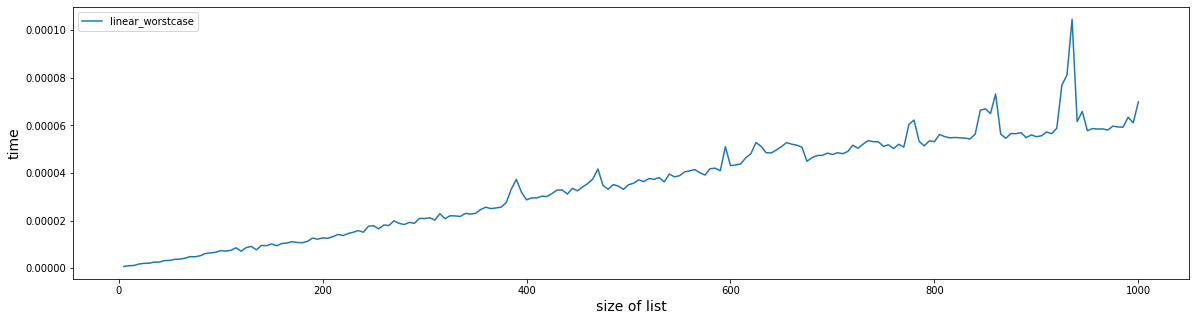

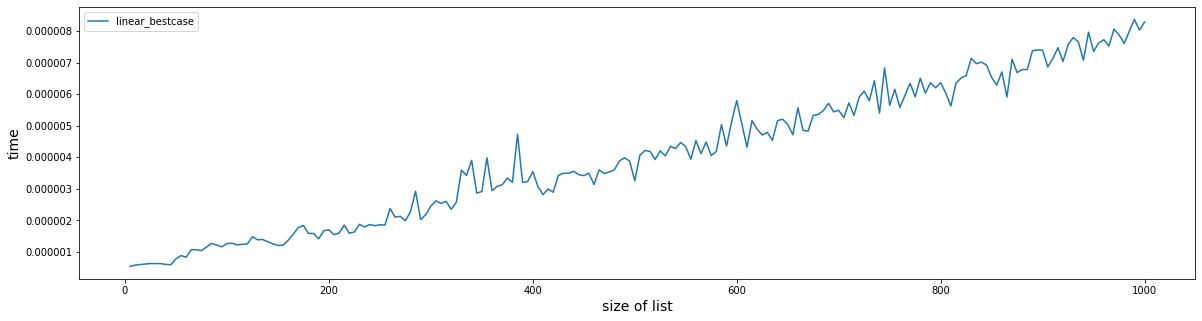

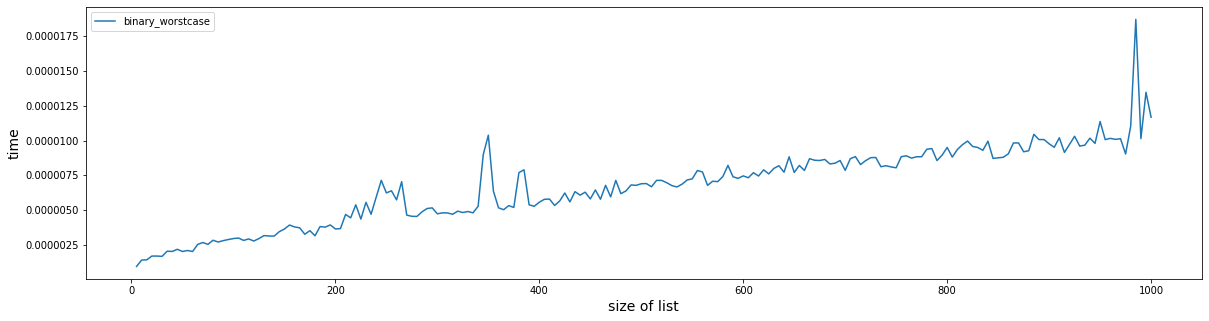

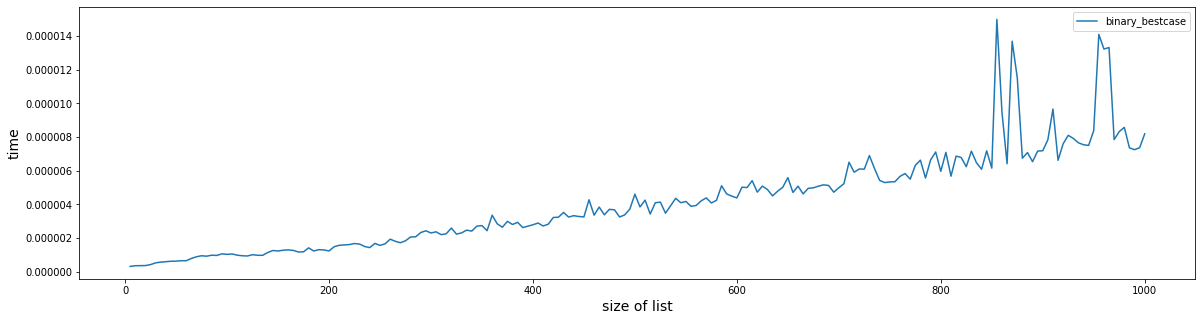

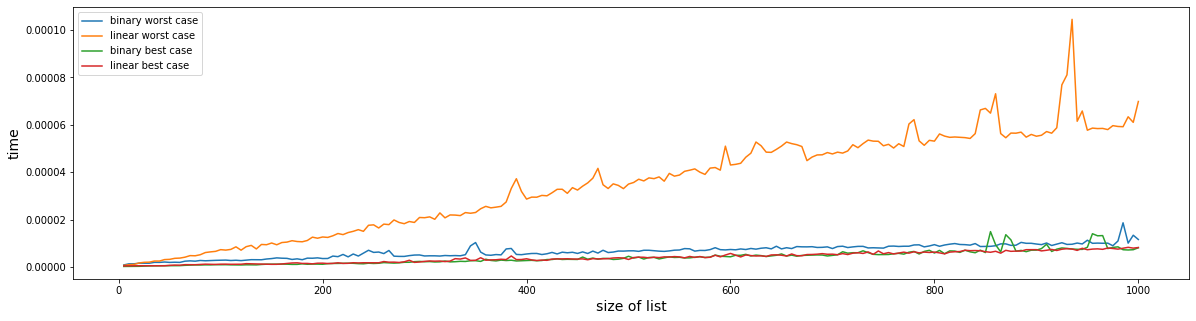

In [39]:
#s is key of the dict
for s in search_times:

    #l is the value of the key
    l = search_times[s]
    
    plt.figure(figsize=(20,5))
    #index the list. l[0] is n and l[1] is the running times
    plt.plot(l[0], l[1], label = s)
    plt.xlabel('size of list',fontsize =14)
    plt.ylabel('time',fontsize =14)
    plt.legend()
    plt.show()

plt.figure(figsize=(20,5))
plt.plot(search_times["binary_worstcase"][0], search_times["binary_worstcase"][1], label = 'binary worst case')
plt.plot(search_times["linear_worstcase"][0], search_times["linear_worstcase"][1], label = 'linear worst case')
plt.plot(search_times["binary_bestcase"][0], search_times["binary_bestcase"][1], label = 'binary best case')
plt.plot(search_times["linear_bestcase"][0], search_times["linear_bestcase"][1], label = 'linear best case')
plt.xlabel('size of list',fontsize =14)
plt.ylabel('time',fontsize =14)
plt.legend()
plt.show()


We can see from the graphs above that the linear worse case is the slowest of the search functions. This is as I expected as the entire array is searched to find the target in the worst case. As expected we can see that the binary worst case is slightly slower than the binary best case. The binary best case and linear best case have similar running times. The best cases both find the target in the first operation so it is expected that their running times be the quickest. As the time complexity for the best cases are theoretically $O(1)$, I would expect them to be less linear and more constant. This is most likely due to the fact that python is dealing with increasingly large arrays.

As with the factorial graphs there is some noise in all graphs. The is most likely due to the computer performing many processes at once.

## Q5 Curve-fitting algorithms

In the cells below I use curve fitting algorithms to find the equation of the running times obtained in the questions above. As described at https://www.youtube.com/watch?v=4vryPwLtjIY and https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html, I have implemented scipy.optomise curve_fit. 

The cell below contains the three curve fitting functions.

In [42]:
def linear_fit_func(x, a, b):
    return a*x + b

def quadratic_fit(x, a, b, c):
    return a*x**2 + b*x + c

def polynomial_fit_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In the cell below I have created a function called ```fit_plot```. This function takes a function name and a dictionary as arguments. In our case the dictionary contains a list. This list contains two lists, ```n``` and the running times. ```fit_plot``` then loops through the keys in the dictionary. The lists comprising the dictionary values are indexed and the values for ```n``` and the running times are passed to the ```curve_fit``` function. The curve fits are then plotted. 

In [43]:
def fit_plot(func, values_dict):

    #loop through the keys in the dictionary
    for s in values_dict:
        #l is the value of each key
        l = values_dict[s]
        
        #index l to create variable x and y
        x = np.array(l[0])
        y = np.array(l[1])

        #pass the function and the values of x and y to curve_fit
        c, cov = curve_fit(func, x, y)

        plt.figure(figsize=(20,5))
        plt.plot(x,y, label = s)
        plt.plot(x,func(x, *c), label = 'best fit')
        plt.xlabel('size of list',fontsize =14)
        plt.ylabel('time',fontsize =14)
        plt.legend()
        plt.show()

### Curve fitting - search algorithms

First I fit the search functions. Theoretically, the worst case for the linear search is $O(n)$. This is because every element in the array must be checked against the target, so the running time increases linearly as the length of the array increases. 

The binary search worst case is $O(logn)$. As explained on page 163 of the course text book 'Data Structures and Algorithms in Python' by Goodrich, the maximum number of recursive calls made during a binary seach of a sequence of length $n$ is $[logn]+1$. In other words, every time the length of the array in doubled in a binary search, only one additional operation is performed. 

The best case for both linear and binary search algorithms is $\Omega(1)$. In the best case both the linear and binary search functions return the first element searched. As a result, the running time is constant regardless of the length of the array. If the array increases in length it will not take any longer to find the target if it is the first element searched in the best case.

Even though I know the binary worst is theoretically $O(logn)$, in the cell below I first fit all search functions to a linear function so that I can compare the results. 

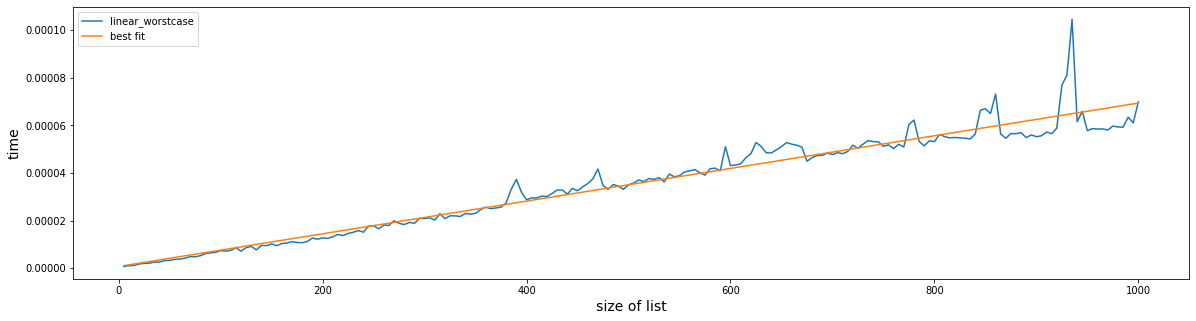

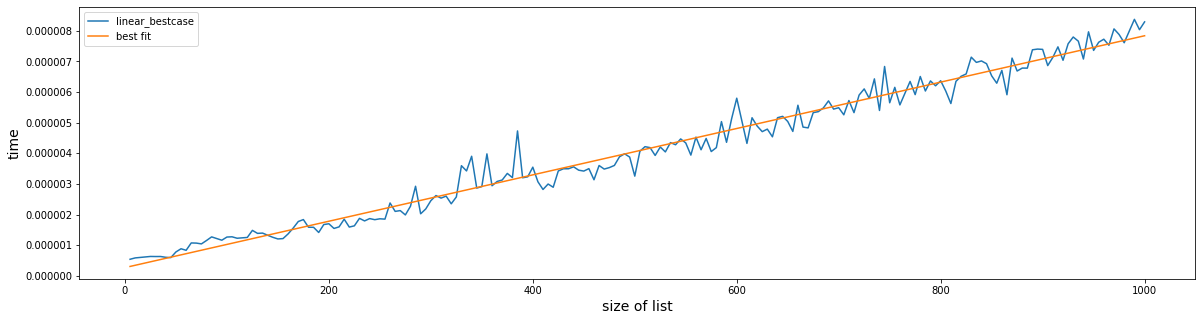

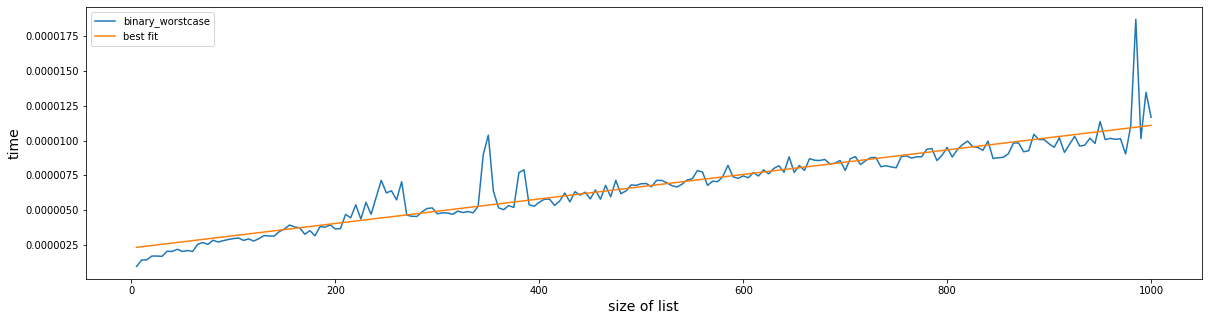

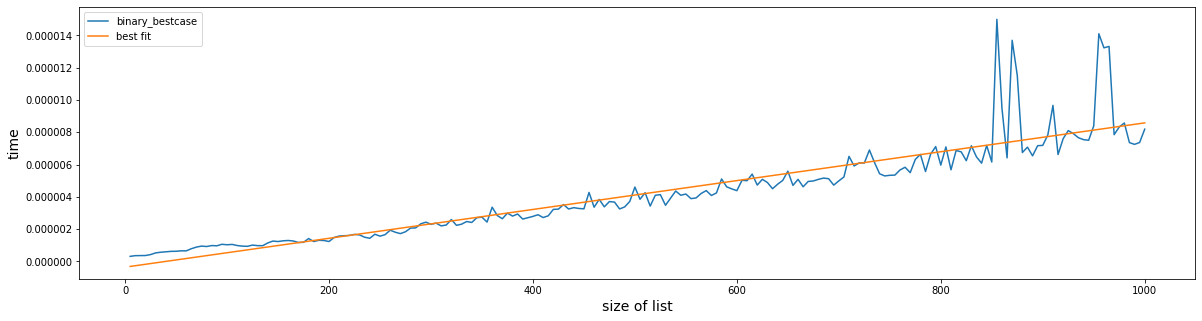

In [44]:
fit_plot(linear_fit_func,search_times)

We can see in the graphs that the linear worst case, linear best case, and binary best case fit reasonably well to a line. Theoretically the binary worstcase is $O(logn)$ and thus a linear fit is not the most suitable fit. In order to investigate the best fit for the binary worst case, in the cells below I plot it with the ```quadratic_fit``` and the ```polynomial_fit_func``` functions. The dictionary ```search_times``` contains the results for the best and worst cases of both the linear and binary search functions so in order to plot only the binary worstcase, I create a new dictionary containing only the binary worstcase which I will then pass to the ```fit_plot``` function. 

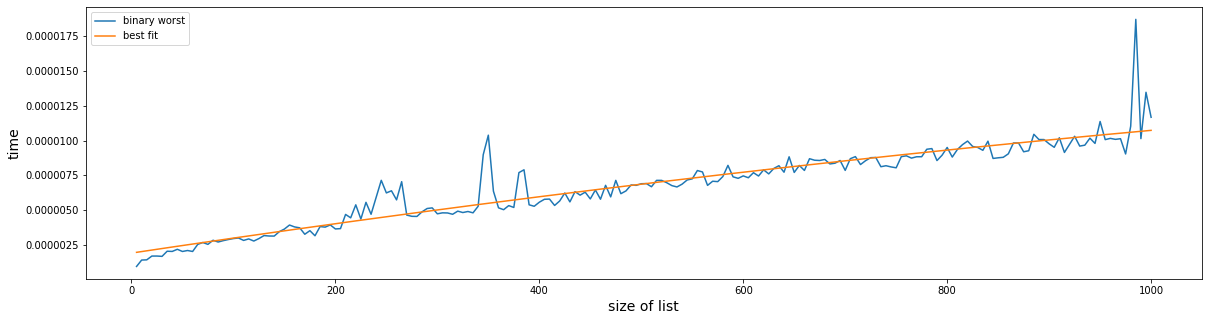

In [45]:
#create a new dictionary containing only the values of n and times for the binary worstcase
binworst  = {"binary worst" : search_times["binary_worstcase"]}
fit_plot(quadratic_fit,binworst)

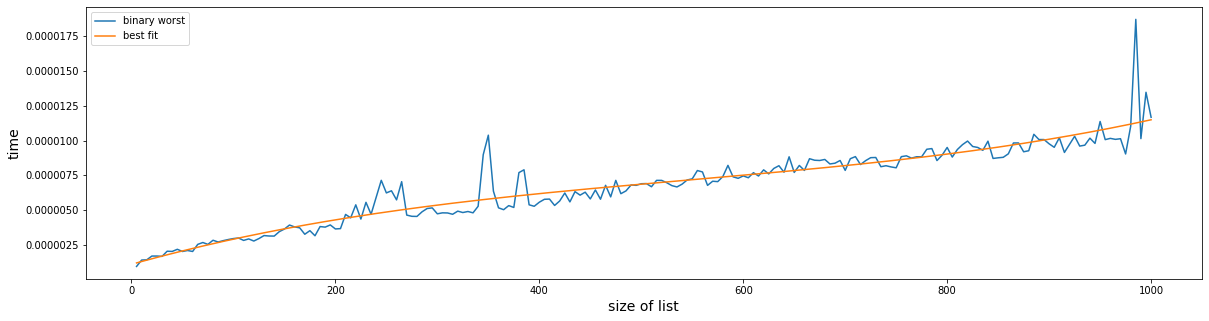

In [46]:
fit_plot(polynomial_fit_func,binworst)

As the worst case for the binary search algorithm is theoretically $O(logn)$, I had expected that the quadratic or polynomial fits would be better than the linear. We can see in the graphs above that the polynomial graphs seems to be the best fit for the $O(logn)$ binary worst case. 

### Curve fitting - factorial algorithms

Theoretically the time complexity of the factorial function is $O(n)$. In the case of the iterative factorial function ```iterative_fact``` which I implemented above, there are ```n``` multiplications within the loop. In the case of the two recursive factorial functions ```non_tail_recursive_fact``` and ```tail_recursive_fact```, there are n+1 activations of the function. Within each recursive activation a constant number of operations is performed. As a result, the time complexity is $O(n)$. 

The best case factorial runs in $\Omega(n)$.

In order to show the linear time complexity I have plotted all three factorial functions with a linear fit in the cell below. 

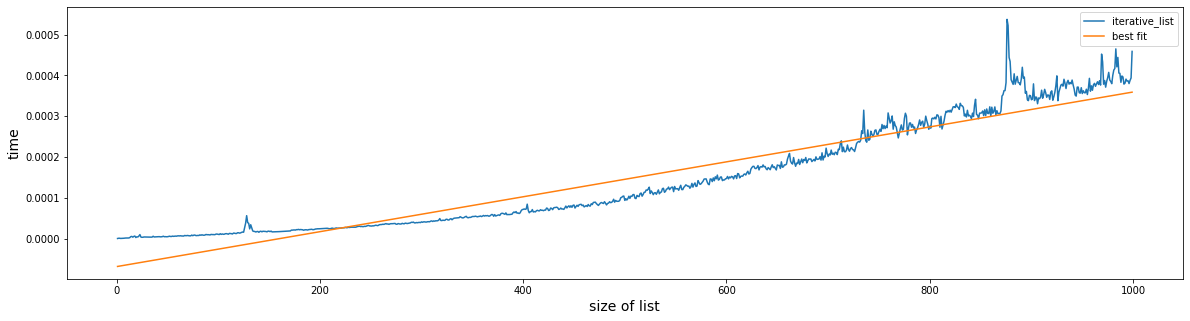

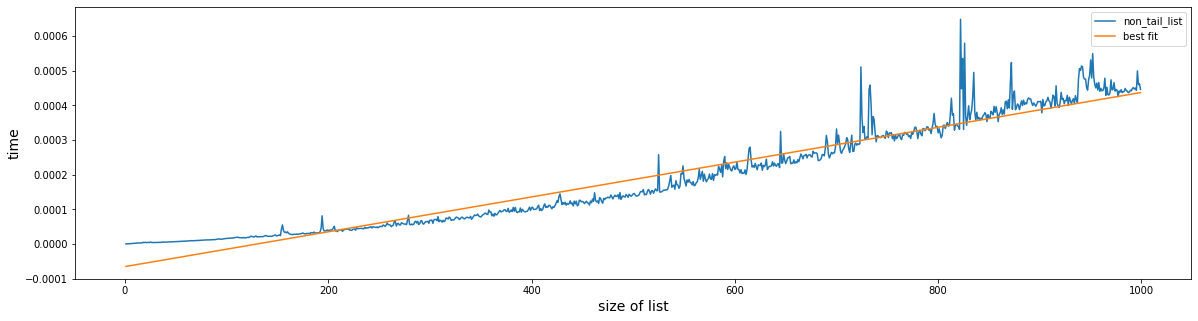

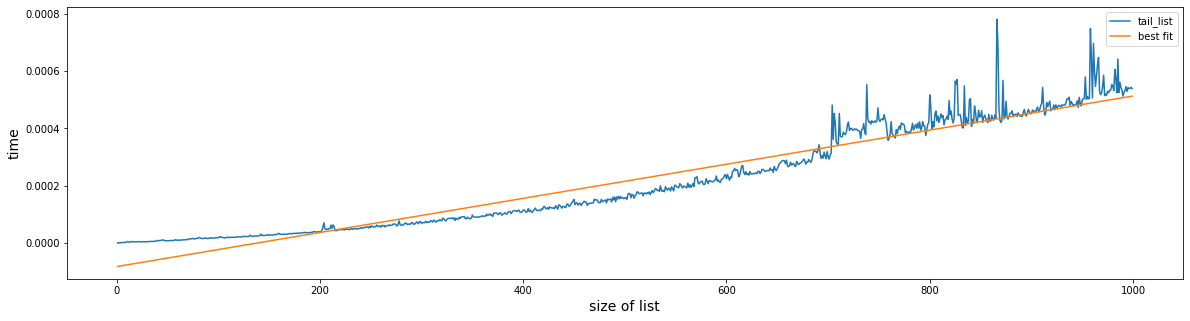

In [47]:
fit_plot(linear_fit_func,fact_times)

As we can see in the graphs above, the linear fit is not as precise as expected. Even though the time complexity of the factorial function is $O(n)$, in the cell below I use a quadratic fit in order to investigate further.

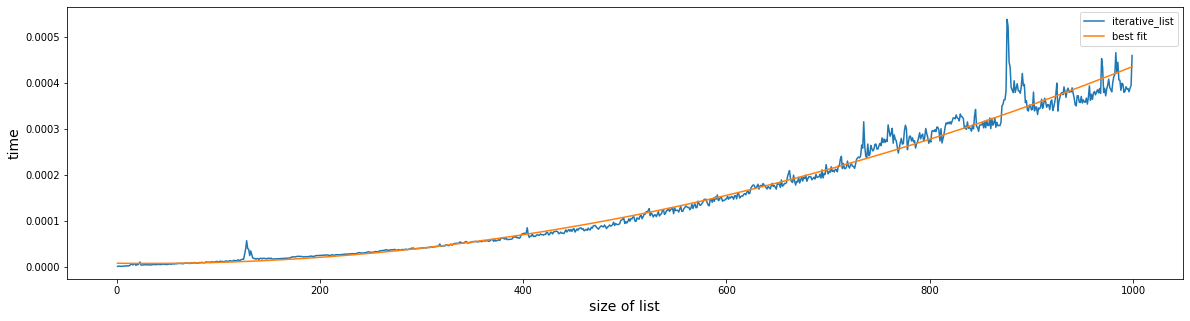

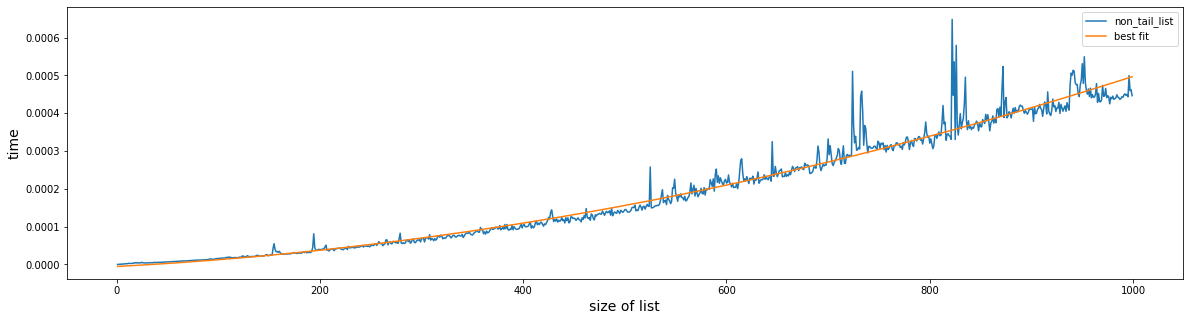

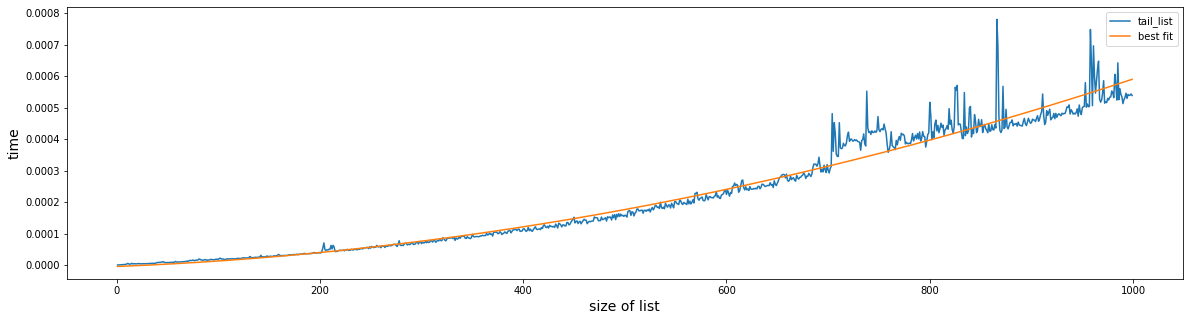

In [48]:
fit_plot(quadratic_fit,fact_times)

Interestingly, we can see that the quadratic fit is better than the linear despite the expected result. In real-world scenarios the theoretical graph is not always obtained. This is perhaps because computers are running multiple processes at once. Perhaps the graph would become more linear as the size of the list increases to much larger sizes. 

## Conclusion

In conclusion, I have learned a lot from this assignment. My understanding of timing functions, time complexity and curve fitting has been deepened. Despite the known theoretical time complextiy of the functions implemented throughout this assignment, we have seen some interesting results, many of which were not as initially expected. These results are understandable when we consider the real-world conditions in which these functions are executed. 